In [1]:
import os
import re
from tqdm import tqdm
import random
from scipy.io import wavfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten 
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization, Activation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import python_speech_features as psf
print(tf.__version__)


2.2.0


In [2]:
path = "data/clean"

label = []
fname = []
length = []
for f in os.listdir(path):
    a = re.split("_",f)
    rate, signal = wavfile.read(path + "/" + f)
    length.append(len(signal)/rate)
    label.append(a[0])
    fname.append(f)
    
dict = {'fname': fname, 'label': label, 'length': length}
df = pd.DataFrame(dict)
classes = list(np.unique(df.label))

print(classes)
df

['awake', 'diaper', 'hug', 'hungry', 'sleepy', 'uncomfortable']


,fname,label,length
0,hungry_92.wav,hungry,13.648500
1,sleepy_73.wav,sleepy,16.168500
2,hug_49.wav,hug,13.847250
3,awake_1.wav,awake,12.803187
4,awake_21.wav,awake,17.621188
...,...,...,...
909,sleepy_140.wav,sleepy,15.305875
910,uncomfortable_114.wav,uncomfortable,8.589313
911,uncomfortable_118.wav,uncomfortable,19.409625
912,hug_151.wav,hug,17.426313


In [50]:
#we could add probability distribution later
n_samples = 12*int(len(fname)/2)
print(n_samples)

5484


SyntaxError: invalid syntax (<ipython-input-11-9b3b4c24af72>, line 3)

100%|██████████| 5484/5484 [01:15<00:00, 72.41it/s]


(128, 199)


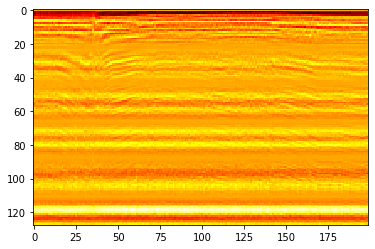

the label is sleepy
number in the classes 5
token is [0. 0. 0. 0. 1. 0.]


In [63]:
class Config:
    def __init__(self, mode='conv', n_mfcc=26, rate=16000, step=2):
        self.mode = 'conv'
        self.n_mfcc = n_mfcc
        self.rate = rate
        self.step_rate = int(rate*step)
def build_feat():
    X =[]
    y=[]
    _min, _max = float('inf'), -float('inf')
    for _ in tqdm(range(n_samples)):
        rand_class = random.choice(classes)
        file = np.random.choice(df[df.label==rand_class].fname)
        rate, wav = wavfile.read(path + "/" + file)
        label = rand_class
        if config.step_rate < wav.shape[0]:
            
            rand_index = np.random.randint(0, wav.shape[0]-config.step_rate)
            sample = wav[rand_index : rand_index+config.step_rate]
        else:
            rand_index = np.random.randint(0, config.step_rate-wav.shape[0])
            sample = np.pad(wav, (rand_index, config.step_rate-wav.shape[0]-rand_index), 'constant', constant_values=0)
        #convert data
        #X_sample = librosa.feature.melspectrogram(y =sample, sr = rate, n_mels=26)
        #X_sample = librosa.feature.mfcc(y =sample, sr = rate, n_mfcdef Conv2D(N_CLASSES=10, SR=16000, DT=1.0):
    i = layers.Input(shape=(1, int(SR*DT)), name='input')
    x = Melspectrogram(n_dft=512, n_hop=160,
                       padding='same', sr=SR, n_mels=128,
                       fmin=0.0, fmax=SR/2, power_melgram=2.0,
                       return_decibel_melgram=True, trainable_fb=False,
                       trainable_kernel=False,
                       name='melbands')(i)
    x = Normalization2D(str_axis='batch', name='batch_norm')(x)
    x = layers.Conv2D(8, kernel_size=(7,7), activation='tanh', padding='same', name='conv2d_tanh')(x)
    x = layers.MaxPooling2D(pool_size=(2,2), padding='same', name='max_pool_2d_1')(x)
    x = layers.Conv2D(16, kernel_size=(5,5), activation='relu', padding='same', name='conv2d_relu_1')(x)
    x = layers.MaxPooling2D(pool_size=(2,2), padding='same', name='max_pool_2d_2')(x)
    x = layers.Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_relu_2')(x)
    x = layers.MaxPooling2D(pool_size=(2,2), padding='same', name='max_pool_2d_3')(x)
    x = layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_relu_3')(x)
    x = layers.MaxPooling2D(pool_size=(2,2), padding='same', name='max_pool_2d_4')(x)
    x = layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', name='conv2d_relu_4')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dropout(rate=0.2, name='dropout')(x)
    x = layers.Dense(64, activation='relu', activity_regularizer=l2(0.001), name='dense')(x)
    o = layers.Dense(N_CLASSES, activation='softmax', name='softmax')(x)

    model = Model(inputs=i, outputs=o, name='2d_convolution')
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return modelc=26)
        X_sample = psf.mfcc(sample, rate, numcep = 128, nfilt=256, nfft=1103).T
        _min = min(np.amin(X_sample), _min)
        _max = max(np.amax(X_sample), _max)
        X.append(X_sample)
        y.append(classes.index(label))
    

        
        
    X, y = np.array(X), np.array(y)
    X = (X - _min)/(_max - _min)
    
    # plotting for testing reason
    plt.imshow(X[0], cmap = 'hot', interpolation = 'nearest')
    print(X[0].shape)
    plt.show()
    
    X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
    
    print('the label is', classes[y[0]])
    print('number in the classes', y[0]+1)
    
    y = keras.utils.to_categorical(y, num_classes=6)
    
    print('token is', y[0])
    return X,y
    




config = Config(mode='conv')

if config.mode == 'conv':
    X, y = build_feat()


Building CNN model

In [ ]:
def get_cnn():
    initializer = tf.keras.initializers.GlorotNormal(seed=None)

    
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            Conv2D(8,(7,7), padding='same',kernel_initializer=initializer),
            BatchNormalization(),
            Activation('tanh'),
            MaxPool2D((2,2)),
            #Dropout(0.3),
            
            Conv2D(16,(5,5), padding='same',kernel_initializer=initializer),
            BatchNormalization(),
            Activation('relu'),
            MaxPool2D((2,2)),
            
            Conv2D(16,(3,3), padding='same',kernel_initializer=initializer),
            BatchNormalization(),
            Activation('relu'),
            MaxPool2D((2,2)),
            
            Conv2D(32,(3,3), padding='same',kernel_initializer=initializer),
            BatchNormalization(),
            Activation('relu'),
            MaxPool2D((2,2)),
            
            Conv2D(32,(3,3), padding='same',kernel_initializer=initializer),
            BatchNormalization(),
            Activation('relu'),
           
            Flatten(),
            Dropout(0.2),
            Dense(64, activation='relu',kernel_initializer=initializer),
            BatchNormalization(),
            Dense(32, activation='relu',kernel_initializer=initializer),
            BatchNormalization(),
            #Dropout(0.2),
            Dense(6, activation='softmax',kernel_initializer=initializer),
        ]
    
    )
    
    model.summary()
    
    opt = keras.optimizers.Adam(0.0002)

    model.compile(loss='categorical_crossentropy',optimizer= opt ,metrics=['acc'])
    
    return model

y_flat = np.argmax(y, axis=1)
input_shape = (X.shape[1], X.shape[2], 1)

model = get_cnn()

history = model.fit(X, y, epochs=30, batch_size=32, shuffle=True, validation_split=0.4)

# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_214 (Conv2D)          (None, 128, 199, 8)       400       
_________________________________________________________________
batch_normalization_250 (Bat (None, 128, 199, 8)       32        
_________________________________________________________________
activation_212 (Activation)  (None, 128, 199, 8)       0         
_________________________________________________________________
max_pooling2d_204 (MaxPoolin (None, 64, 99, 8)         0         
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 64, 99, 16)        3216      
_________________________________________________________________
batch_normalization_251 (Bat (None, 64, 99, 16)        64        
_________________________________________________________________
activation_213 (Activation)  (None, 64, 99, 16)      

KeyboardInterrupt: 

In [ ]:
history = model.fit(X, y, epochs=10, batch_size=16, shuffle=True, validation_split=0.1)

# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
1029/1029 [==============================] - 6s 6ms/step - loss: 0.1300 - acc: 0.9581 - val_loss: 1.3268 - val_acc: 0.7030
Epoch 2/10
1029/1029 [==============================] - 7s 7ms/step - loss: 0.1263 - acc: 0.9593 - val_loss: 1.8328 - val_acc: 0.6214
Epoch 3/10
1029/1029 [==============================] - 7s 7ms/step - loss: 0.1243 - acc: 0.9596 - val_loss: 1.3489 - val_acc: 0.7117
Epoch 4/10
1029/1029 [==============================] - 6s 6ms/step - loss: 0.1244 - acc: 0.9587 - val_loss: 2.0966 - val_acc: 0.5979
Epoch 5/10
1029/1029 [==============================] - 6s 5ms/step - loss: 0.1120 - acc: 0.9646 - val_loss: 2.2739 - val_acc: 0.5367
Epoch 6/10
1029/1029 [==============================] - 5s 5ms/step - loss: 0.1241 - acc: 0.9592 - val_loss: 3.4381 - val_acc: 0.4032
Epoch 7/10
 549/1029 [===============>..............] - ETA: 2s - loss: 0.0976 - acc: 0.9691

In [35]:
model.save('/tmp/model1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/model1/assets


In [43]:
loaded_model = tf.keras.models.load_model('/tmp/model')

In [38]:
loaded_model.fit(X, y, epochs=10, batch_size=5, shuffle=True,)

Epoch 1/10
1828/1828 [==============================] - 9s 5ms/step - loss: 0.4399 - acc: 0.8761
Epoch 2/10
1828/1828 [==============================] - 8s 4ms/step - loss: 0.3292 - acc: 0.8969
Epoch 3/10
1828/1828 [==============================] - 9s 5ms/step - loss: 0.3376 - acc: 0.8953
Epoch 4/10
1828/1828 [==============================] - 10s 6ms/step - loss: 0.3032 - acc: 0.9077
Epoch 5/10
1828/1828 [==============================] - 8s 4ms/step - loss: 0.2934 - acc: 0.9108
Epoch 6/10
  69/1828 [>.............................] - ETA: 5s - loss: 0.2416 - acc: 0.9043

KeyboardInterrupt: 

In [7]:
data = np.array([X[0]])
data.shape

print(np.sum(model.predict(data), axis=0))
np.argmax(model.predict(data))

[4.5438553e-04 3.5219756e-08 9.9917704e-01 3.6820836e-04 3.6574781e-07
 1.0597545e-08]


2